<a href="https://colab.research.google.com/github/dapsavoie/tz_water_well_prediction/blob/master/EDA_%26_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [0]:
import os 
import pandas as pd
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_values = pd.read_csv('/content/drive/My Drive/tz_water_well_data/training_set_labels.csv')
df_labels = pd.read_csv('/content/drive/My Drive/tz_water_well_data/training_set_values.csv')
df_test_set = pd.read_csv('/content/drive/My Drive/tz_water_well_data/test_set_values.csv')
df_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
df_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


# Distribution of Status Group of the wells

Created Functional and non functional dataframes for export to teams 

To Do List
Status Groups by Regions (To Do)
tatus Groups by Funders (Tod Do)

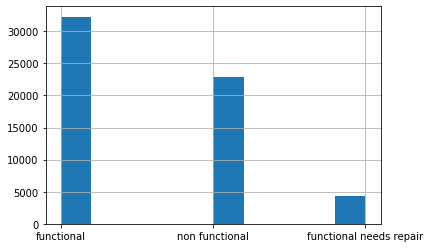

In [6]:
df_labels['status_group'].hist()

In [0]:
#merge dataframes to find which installers have non-functional, functional needs repair
#statuses on their wells 

merged = pd.merge(df_labels, df_values, on='id', how='left')
merged = pd.DataFrame(merged)

In [8]:
non_functionals =  merged[merged['status_group'] == 'non functional']
non_functionals['installer'].value_counts()

DWE                   6347
Government            1034
RWE                    765
Central government     450
DANIDA                 425
                      ... 
Tanzania/ Egypt          1
KUMKUM                   1
go                       1
WIZARA                   1
Mzee Waziri Tajari       1
Name: installer, Length: 1201, dtype: int64

In [9]:
functional_needs_repair = merged[merged['status_group'] == 'functional needs repair']
functional_needs_repair['installer'].value_counts()

DWE                      1622
Government                256
RWE                       137
DANIDA                     83
LGA                        81
                         ... 
CIPRO                       1
Lutheran Church             1
LGQ                         1
Halmashauri ya wilaya       1
Biore                       1
Name: installer, Length: 368, dtype: int64

# Top Installers

To Do
*   Need to impute other for smaller groups




In [10]:
# Top Installers 

installers = df_values['installer'].value_counts().rename_axis('Installers').reset_index(name='counts')
print(installers.head(20))

            Installers  counts
0                  DWE   17402
1           Government    1825
2                  RWE    1206
3                Commu    1060
4               DANIDA    1050
5                 KKKT     898
6               Hesawa     840
7                    0     777
8                 TCRS     707
9   Central government     622
10                 CES     610
11           Community     553
12               DANID     552
13    District Council     551
14              HESAWA     539
15                 LGA     408
16        World vision     408
17              WEDECO     397
18               TASAF     396
19    District council     392


In [1]:
#Columns to clean
'DWE'                   
'Government'             
'RWE'                   
'Commu'                  
'DANIDA'                 
'KKKT'                    
'Hesawa'                  
'0'                       
'TCRS'                   
'Central government'      
'CES'                     
'Community'               
'DANID'                  
'District Council/District council'           
'HESAWA'                  
'LGA'                     
'World vision'            
'WEDECO'                 
'TASAF' 
#Create other Columns
'Other'

'Other'

# Changing the rest of the Installers to other 
## Working on df_values

In [13]:
#return a dataframe of top 20 installers 
installers = df_values['installer'].value_counts().rename_axis('Installers').reset_index(name='counts')
top_20 = installers.loc[0:19]
top_20

,Installers,counts
0,DWE,17402
1,Government,1825
2,RWE,1206
3,Commu,1060
4,DANIDA,1050
5,KKKT,898
6,Hesawa,840
7,0,777
8,TCRS,707
9,Central government,622


In [14]:
#change the value of a single row 

others = installers.loc[installers['installer'] != 'DWE'                   
'Government'             
'RWE'                   
'Commu'                  
'DANIDA'                 
'KKKT'                    
'Hesawa'                  
'0'                       
'TCRS'                   
'Central government'      
'CES'                     
'Community'               
'DANID'                  
'District Council/District council'           
'HESAWA'                  
'LGA'                     
'World vision'            
'WEDECO'                 
'TASAF']



KeyError: ignored

In [15]:
df_values['installer'].dtype

dtype('O')

In [0]:
valid = ['DWE'                   
'Government'             
'RWE'                   
'Commu'                  
'DANIDA'                 
'KKKT'                    
'Hesawa'                  
'0'                       
'TCRS'                   
'Central government'      
'CES'                     
'Community'               
'DANID'                  
'District Council/District council'           
'HESAWA'                  
'LGA'                     
'World vision'            
'WEDECO'                 
'TASAF']

In [17]:
df_values.loc[20:, 'installer'] 

#df_values.drop(columns='other', inplace=True)

df_values[20:]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
20,48375,200.0,2011-02-27,Twe,2216,TWE,34.473430,-9.594990e+00,none,0,Lake Nyasa,Majengo,Iringa,11,4,Njombe,Matola,4,True,GeoData Consultants Ltd,VWC,Kidabu,False,2008,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.000000,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
22,58500,0.0,2011-10-04,Unicef,1510,DWE,34.586901,-8.980014e+00,Shuleni,0,Rufiji,Mkanivega,Iringa,11,4,Njombe,Usuka,350,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1978,gravity,gravity,gravity,wua,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
23,37862,500.0,2013-11-03,Isf,672,ISF,37.940029,-4.125595e+00,Kinonga,0,Pangani,Mkonga Juu,Kilimanjaro,3,3,Same,Kisiwani,210,True,GeoData Consultants Ltd,Water authority,Mashangwi,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
24,51058,0.0,2013-01-21,African Development Bank,1645,DWE,29.747066,-4.495568e+00,Kamsasa,0,Lake Tanganyika,Msasa,Kigoma,16,3,Kigoma Rural,Mkigo,156,False,GeoData Consultants Ltd,VWC,Quick wins Program,True,2009,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847e+00,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629e+00,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434e+00,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573e+00,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


# Encoding Categorical Variables 

*   Changing to datetime
*   Dropped null columns 
*   Dropped null columns
*   Get Dummies





In [18]:
#Drop Nulls and update df_values 
df_values['date_recorded'] = pd.to_datetime(df_values['date_recorded'])
df_values['construction_year'] = pd.to_datetime(df_values['construction_year'])

df_values[['date_recorded', 'construction_year']].dtypes

date_recorded        datetime64[ns]
construction_year    datetime64[ns]
dtype: object

In [19]:
df_values.isnull().sum() 

#'funder', 'installer', 'subvillage', 'public_meeting'. 'scheme_management', 'scheme_name', 'permit'

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [0]:
df_values.columns
predictors = df_values.drop(columns=[ 'date_recorded', 'longitude', 'latitude', 'recorded_by', 'permit',  'scheme_management', 'scheme_name', 'permit', 'funder', 
                            'installer', 'subvillage', 'public_meeting'])

In [21]:
data = pd.get_dummies(predictors)
data.head()

,id,amount_tsh,gps_height,num_private,region_code,district_code,population,construction_year,wpt_name_24,wpt_name_A Kulwa,wpt_name_A Saidi,wpt_name_Abass,wpt_name_Abbas,wpt_name_Abdala Hamisi,wpt_name_Abdala Mwandute,wpt_name_Abdalaa,wpt_name_Abdalah,wpt_name_Abdalah Ali,wpt_name_Abdalah Mashaka,wpt_name_Abdalah Miliki,wpt_name_Abdalah Mwakibona,wpt_name_Abdalah Shombe,wpt_name_Abdalamani Mussa,wpt_name_Abdalla Nambambili,wpt_name_Abdallah Chingi,wpt_name_Abdallah Miwani,wpt_name_Abdallah Mponzi,wpt_name_Abdallah Nassor Msabaha,wpt_name_Abdallah Nassoro,wpt_name_Abdi,wpt_name_Abdieri Serakike,wpt_name_Abdu,wpt_name_Abdul,wpt_name_Abdul Sharif,wpt_name_Abdul Swalehe,wpt_name_Abedi Taliwa,wpt_name_Abel Mgaya,wpt_name_Abel Mwalongo,wpt_name_Abel Nasari,wpt_name_Abel Tewene,...,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,0,11,5,109,1970-01-01 00:00:00.000001999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,8776,0.0,1399,0,20,2,280,1970-01-01 00:00:00.000002010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,686,0,21,4,250,1970-01-01 00:00:00.000002009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,0,90,63,58,1970-01-01 00:00:00.000001986,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,0,0,18,1,0,1970-01-01 00:00:00.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [0]:
#export to google drive as clean_training_set_labels
# file ended up being too big to load 

In [0]:
# data.to_csv(r'/content/drive/My Drive/tz_water_well_data/clean_training_set_labels.csv', index = False)

Streaming output truncated to the last 5000 lines.
The above exception was the direct cause of the following exception:

SystemError: <built-in method item of numpy.ndarray object at 0x7f7333d450d0> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method item of numpy.ndarray object at 0x7f7333d450d0> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method item of numpy.ndarray object at 0x7f7333d450d0> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method item of numpy.ndarray object at 0x7f7333d450d0> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method item of numpy.ndarray object at 0x7f7333d450d0> returned a result with an error set

The above exception was 

In [0]:
data.to_csv(r'clean_training_set_labels.csv', index = False)